In [27]:
import numpy as np 
import os 
import pandas as pd 
from scipy.fft import fft, fftshift, fftfreq
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [28]:
path = 'data/'
os.listdir(path)

['Brian_Deadlift_25lbs-2024-09-13_00-42-14.json',
 'brian_bench_25lbs-2024-09-13_00-17-29.json',
 'Tejas_Bench_0lbs-2024-09-13_00-13-30.json',
 'Brian_Bench_0_lbs-2024-09-13_00-07-34.json',
 'Neal_Squat_0lbs-2024-09-13_00-29-33.json',
 'Neal_25lbs_Squat-2024-09-13_00-38-02.json',
 'Neal_Bench_0lbs-2024-09-13_00-10-30.json',
 'Brian_25_Squat-2024-09-13_00-33-58.json',
 'Neal_0_Squat-2024-09-13_00-36-38.json',
 'brian_Swuat_0lbs-2024-09-13_00-27-39.json',
 'Neal_Bench_25lbs-2024-09-13_00-19-25.json',
 'Neal_25_deadlift-2024-09-13_00-44-42.json',
 'Novel_Bench_0lbs-2024-09-13_00-15-12.json',
 'Neal_25lbs_Deadlift-2024-09-13_00-40-34.json',
 'Novel_25lbs_Bench-2024-09-13_00-22-49.json',
 'Tejas_Bench_25lbs-2024-09-13_00-21-16.json']

In [29]:
bench, squat, deadlift = [], [], []
b, s, d = [], [], []
for e in os.listdir(path):
    if 'json' in e:
        if 'bench' in e or 'Bench' in e and 'Novel' not in e:
            bench.append(pd.read_json(path + e))
            b.append(e)
        elif 'Squat' in e or 'squat' in e or 'Swuat' in e:
            squat.append(pd.read_json(path+e))
            s.append(e)
        else:
            d.append(e)
            deadlift.append(pd.read_json(path+e))



In [30]:
b

['brian_bench_25lbs-2024-09-13_00-17-29.json',
 'Tejas_Bench_0lbs-2024-09-13_00-13-30.json',
 'Brian_Bench_0_lbs-2024-09-13_00-07-34.json',
 'Neal_Bench_0lbs-2024-09-13_00-10-30.json',
 'Neal_Bench_25lbs-2024-09-13_00-19-25.json',
 'Tejas_Bench_25lbs-2024-09-13_00-21-16.json']

In [31]:
d

['Brian_Deadlift_25lbs-2024-09-13_00-42-14.json',
 'Neal_25_deadlift-2024-09-13_00-44-42.json',
 'Novel_Bench_0lbs-2024-09-13_00-15-12.json',
 'Neal_25lbs_Deadlift-2024-09-13_00-40-34.json',
 'Novel_25lbs_Bench-2024-09-13_00-22-49.json']

In [32]:
s

['Neal_Squat_0lbs-2024-09-13_00-29-33.json',
 'Neal_25lbs_Squat-2024-09-13_00-38-02.json',
 'Brian_25_Squat-2024-09-13_00-33-58.json',
 'Neal_0_Squat-2024-09-13_00-36-38.json',
 'brian_Swuat_0lbs-2024-09-13_00-27-39.json']

In [33]:
squat[1].axes

[RangeIndex(start=0, stop=2406, step=1),
 Index(['relativeAltitude', 'seconds_elapsed', 'pressure', 'sensor', 'time',
        'device id', 'version', 'device name', 'sampleRateMs',
        'recording epoch time', 'recording time', 'platform', 'standardisation',
        'recording timezone', 'appVersion', 'sensors', 'accelerationY',
        'quaternionW', 'accelerationZ', 'gravityX', 'rotationRateY',
        'rotationRateZ', 'gravityY', 'quaternionX', 'quaternionY',
        'quaternionZ', 'gravityZ', 'accelerationX', 'rotationRateX'],
       dtype='object')]

In [38]:
Fs=100
def plot_fft_against_eachother(s1, s2, s3, signame=None):
    
    s1 = s1.dropna().to_numpy()
    s2 = s2.dropna().to_numpy()
    s3 = s3.dropna().to_numpy()
    num_rows, num_cols = 3, 3
    fig = make_subplots(rows = num_rows, cols=num_cols,subplot_titles=signame )
    
    i = 1
    for s in [s1, s2, s3]:
    
        s = s - np.mean(s) # remove dc offset
        n = np.size(s) #number of samples 
        t = list(range(n))
        freq = Fs * np.linspace(0, 1, int(n/2))/2 #get all possible frequencies we can sample: np.linspace(.)/2 = [0, 4/n, 8/n, ... 1/2]
        dft = (fft(s)[0:np.size(freq)]) #sample all frequencies we can 
        mag = abs(dft)
        phase = np.arctan(dft.imag/(dft.real))
    
        
        fig.add_trace(
            go.Scatter(x=t, y=s),
            row=1, col=i
        )
        fig.add_trace(
            go.Scatter(x=freq, y=mag),
            row=2, col=i
        )
        fig.add_trace(
            go.Scatter(x=freq, y=phase),
            row=3, col=i
        )
        i+=1
        
    fig.update_layout(title_text="", height=700)
    fig.show()

In [39]:
label = 'gravityX'


In [42]:
s1, s2, s3 = bench[0][label], deadlift[0][label], squat[2][label] 

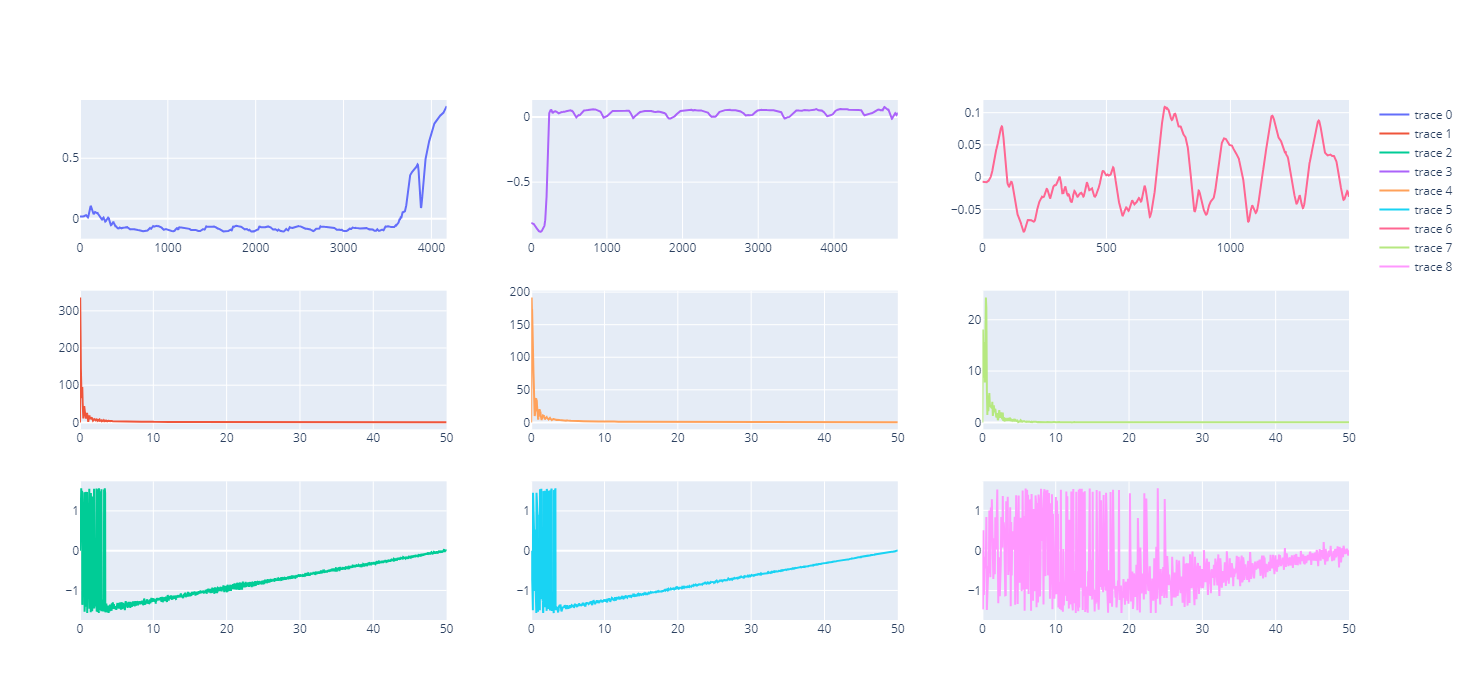

In [43]:
plot_fft_against_eachother(s1, s2, s3)